In [15]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import csv
import requests
import time
import json
import numpy as np
from datetime import datetime
#import openweathermapy.core as owm
from citipy import citipy
from pprint import pprint
from numpy import random


In [16]:
# Url and query url
from api_keys import api_key
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query = f"{url}appid={api_key}&units={units}&q=" 

In [17]:
# Random lat and long for 500 cities
n = 500
cities = []
country_codes = []
for x in range(n):
    lat = np.random.uniform(-90,90)
    lng = np.random.uniform(-180,180)
    city = citipy.nearest_city(lat, lng)
# Appending cities    
    cities.append(city.city_name)
    country_codes.append(city.country_code)
country_codes = [x.upper() for x in country_codes]

In [18]:
# Extract object to get the temperature, humidity,...
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
dates = []

In [19]:
for x in range(len(cities)):
    response = requests.get(f"{query}{cities[x]},{country_codes[x].upper()}").json()
# There are some cities data is unavailable, to set their values to numpy's NaN
    try:
        temperature.append(response['main']['temp_max'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        dates.append(response['dt'])
    except KeyError:
        temperature.append(np.nan)
        latitude.append(np.nan)
        longitude.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        dates.append(np.nan)
    try:
        cloudiness.append(response['clouds']['all'])
    except KeyError: 
        cloudiness.append(0)
# Print city name and query string
    print(f"Processing record {x + 1} | {cities[x]}")
    print(f"{query}{cities[x]},{country_codes[x].upper()}")

print("-----------------------------------------------")
print("Data Processing Complete")
print("-----------------------------------------------")
weather_df = pd.DataFrame({"City": cities,
                           "Latitude": latitude,
                           "Longitude": longitude,
                           "Humidity": humidity,
                           "Max Temp": temperature,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                           "Date": dates,
                           "Country": country_codes
                          })

Processing record 1 | hithadhoo
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=hithadhoo,MV
Processing record 2 | chapais
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=chapais,CA
Processing record 3 | jamestown
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=jamestown,SH
Processing record 4 | belushya guba
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=belushya guba,RU
Processing record 5 | mataura
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=mataura,PF
Processing record 6 | victoria
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=victoria,SC
Processing record 7 | zhanatas
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&un

Processing record 58 | te anau
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=te anau,NZ
Processing record 59 | fereydunshahr
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=fereydunshahr,IR
Processing record 60 | luderitz
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=luderitz,NA
Processing record 61 | kurumkan
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=kurumkan,RU
Processing record 62 | punta arenas
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=punta arenas,CL
Processing record 63 | kurtamysh
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=kurtamysh,RU
Processing record 64 | tuktoyaktuk
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b350

Processing record 114 | barentsburg
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=barentsburg,SJ
Processing record 115 | tuktoyaktuk
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=tuktoyaktuk,CA
Processing record 116 | farafangana
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=farafangana,MG
Processing record 117 | ushuaia
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=ushuaia,AR
Processing record 118 | rawson
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=rawson,AR
Processing record 119 | sahrak
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=sahrak,AF
Processing record 120 | katsuura
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6d

Processing record 171 | bengkulu
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=bengkulu,ID
Processing record 172 | dikson
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=dikson,RU
Processing record 173 | ushuaia
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=ushuaia,AR
Processing record 174 | mataura
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=mataura,PF
Processing record 175 | punta arenas
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=punta arenas,CL
Processing record 176 | mataura
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=mataura,PF
Processing record 177 | tiksi
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&uni

Processing record 226 | castro
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=castro,CL
Processing record 227 | kendari
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=kendari,ID
Processing record 228 | belmonte
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=belmonte,BR
Processing record 229 | busselton
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=busselton,AU
Processing record 230 | arman
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=arman,RU
Processing record 231 | roma
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=roma,AU
Processing record 232 | sabancuy
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=s

Processing record 283 | sterlibashevo
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=sterlibashevo,RU
Processing record 284 | lethem
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=lethem,GY
Processing record 285 | iqaluit
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=iqaluit,CA
Processing record 286 | putina
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=putina,PE
Processing record 287 | kapaa
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=kapaa,US
Processing record 288 | karkaralinsk
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=karkaralinsk,KZ
Processing record 289 | rikitea
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8

Processing record 339 | hithadhoo
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=hithadhoo,MV
Processing record 340 | tautira
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=tautira,PF
Processing record 341 | vaini
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=vaini,TO
Processing record 342 | mogadishu
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=mogadishu,SO
Processing record 343 | hithadhoo
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=hithadhoo,MV
Processing record 344 | ushuaia
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=ushuaia,AR
Processing record 345 | upernavik
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&u

Processing record 396 | haines junction
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=haines junction,CA
Processing record 397 | mataura
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=mataura,PF
Processing record 398 | arraial do cabo
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=arraial do cabo,BR
Processing record 399 | atuona
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=atuona,PF
Processing record 400 | port alfred
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=port alfred,ZA
Processing record 401 | maki
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=maki,JP
Processing record 402 | coahuayana
https://api.openweathermap.org/data/2.5/weather?appid=337885eee

Processing record 453 | viedma
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=viedma,AR
Processing record 454 | punta arenas
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=punta arenas,CL
Processing record 455 | ushuaia
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=ushuaia,AR
Processing record 456 | sao joao da barra
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=sao joao da barra,BR
Processing record 457 | rikitea
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=rikitea,PF
Processing record 458 | longyearbyen
https://api.openweathermap.org/data/2.5/weather?appid=337885eeebd27b3505f7c6db20edb8a8&units=metric&q=longyearbyen,SJ
Processing record 459 | belmonte
https://api.openweathermap.org/data/2.5/weather?appid=33788

In [22]:
# Remove cities with nan values
weather_df = weather_df.dropna(how='any')

print(f"The data frame contains {len(weather_df['City'])} unique cities.")

The data frame contains 422 unique cities.


In [23]:
weather_df.head(10)

,City,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed,Date,Country
0,hithadhoo,-0.60,73.08,76.0,27.65,99,10.22,1.563212e+09,MV
1,chapais,49.78,-74.86,44.0,24.00,20,4.60,1.563212e+09,CA
2,jamestown,-15.94,-5.72,66.0,20.25,64,4.75,1.563212e+09,SH
5,victoria,-4.62,55.45,83.0,26.00,40,4.10,1.563212e+09,SC
7,montelibano,7.98,-75.42,73.0,29.45,77,0.82,1.563212e+09,CO
8,isangel,-19.55,169.27,73.0,22.75,57,3.99,1.563212e+09,VU
9,andros town,24.73,-77.79,66.0,32.22,40,5.10,1.563212e+09,BS
10,gwanda,-20.94,29.00,46.0,14.55,12,3.42,1.563212e+09,ZW
11,ravar,31.27,56.81,14.0,27.25,0,5.07,1.563212e+09,IR
12,hilo,19.71,-155.08,73.0,25.00,90,1.50,1.563212e+09,US


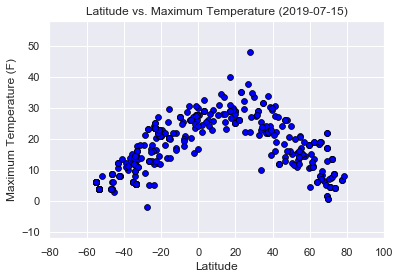

In [25]:
# The aesthetic using Seaborn
sns.set()
# Ploting the latitude vs the max temperature
plt.scatter(x = weather_df['Latitude'], y = weather_df['Max Temp'],
           linewidths = 0.75, edgecolors = 'black', color =  'blue', s=35)
#Lables
# Extracting the date and convert it to the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Maximum Temperature ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
# Modify ticks
plt.xlim(-80,100) 
plt.ylim(min(weather_df['Max Temp']) - 10,max(weather_df['Max Temp']) + 10)  
plt.show()

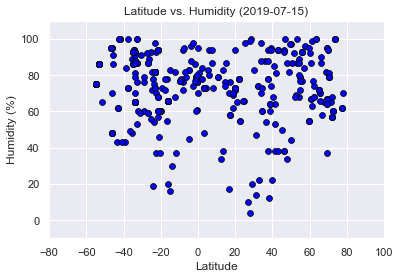

In [26]:
sns.set()
plt.scatter(x = weather_df['Latitude'], y = weather_df['Humidity'],
           linewidths = 0.75, edgecolors = 'black', color =  'blue', s=35)
# Lables
# Extracting the date and convert it to the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Humidity ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Tick modifications
plt.xlim(-80,100)
plt.ylim(-10,110)
plt.show()

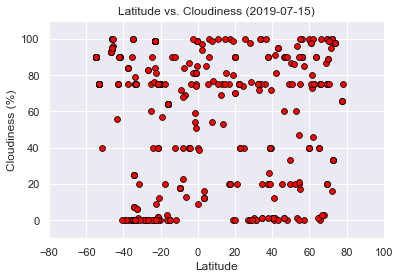

In [28]:
sns.set()
plt.scatter(x = weather_df['Latitude'], y = weather_df['Cloudiness'],
           linewidths = 0.75, edgecolors = 'black', color =  'red', s=35)
# Lables
# Extracting the date and convert it to the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Cloudiness ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Tick modifications
plt.xlim(-80,100)
plt.ylim(-10,110)
plt.show()

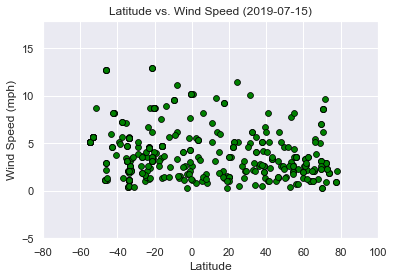

In [30]:
sns.set()
plt.scatter(x = weather_df['Latitude'], y = weather_df['Wind Speed'],
           linewidths = 0.75, edgecolors = 'black', color =  'green', s=35)
# Lables
# Extracting the date and convert it to the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Wind Speed ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# Tick modifications
plt.xlim(-80,100)
plt.ylim(-5,max(weather_df['Wind Speed'])+5)
plt.show()